In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
input_str = '<' + input_str + '>'
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
           'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '<', '\'', '>']
print(f'{letters=}')
# print(f'{input_str=}')

len(letters)=32
502
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '<', "'", '>']


In [3]:
# generate SDR

SDR_len = 128 # 128
sparsity = 4 # 4
max_overlap = 1 # 1

sparse_prob = sparsity / SDR_len

letter_SDRs = {}

for letter in letters:
    while True:
        rnd_SDR = np.random.choice([0, 1], SDR_len, True, [1 - sparse_prob, sparse_prob])

        if (rnd_SDR > 0).sum() != sparsity:
            continue
        
        is_over_max = False
        for SDR in letter_SDRs.values():
            if (SDR & rnd_SDR).sum() > max_overlap:
                is_over_max = True
                break
        
        if is_over_max:
            continue
            
        break
    
    # print(f'{letter}')
    letter_SDRs.setdefault(letter, rnd_SDR)

for letter, SDR in letter_SDRs.items():
    print(f'{letter} : {(SDR > 0).sum()} {SDR.tolist()}')

a : 4 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b : 4 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
c : 4 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0

In [4]:
# text to SDRs
input_SDRs = []

for inp in input_str:
    input_SDRs.append(letter_SDRs[inp])

print(f'{len(input_SDRs)=}')

# for SDR in input_SDRs:
#     print(f'{SDR.tolist()}')

len(input_SDRs)=502


In [5]:
# init start column
column_size = 16

start_SDR = letter_SDRs['<']

start_I = np.zeros((start_SDR.size, column_size))

active_start_SDR_idx = np.where(start_SDR == 1)

for as_idx in active_start_SDR_idx[0]:
    rnd_active = np.random.randint(column_size)

    start_I[as_idx][rnd_active] = 1

# for col in np.rot90(start_I):
#     print(f'{col.astype(int).tolist()}')

In [6]:
I = np.zeros((SDR_len, column_size))
O = np.zeros((SDR_len, column_size))

W = np.random.rand(SDR_len, column_size, SDR_len * column_size) * 1e-2

V = np.zeros((SDR_len, column_size))

TR = np.zeros((SDR_len, column_size))
PO = np.zeros((SDR_len, column_size))

prec = 1e-30

# train

epoch_cnt = 3

eps0 = 0.003
TR_eps0 = 0.03 * 4 # 0.15

eps0_V = 0.09

coef_TR = 0.8

for epoch_idx in range(epoch_cnt):
    I = np.copy(start_I)

    for SDR in input_SDRs[1:]:
        rsh_I = I.reshape(SDR_len * column_size)

        O = np.dot(W, rsh_I)

        O /= np.max(np.abs(O)) + prec
        
        # threshold
        min_O = np.min(O)
        O[O < TR * coef_TR] = min_O
        OO = np.copy(O)

        # boosting
        nV = np.abs(V - np.max(V, axis=1)[np.newaxis].T)
        nV /= np.max(nV, axis=1)[np.newaxis].T + prec

        OV = O + nV * eps0_V

        OV *= SDR[np.newaxis].T
        max_O = np.max(OV, axis=1)

        O *= SDR[np.newaxis].T
        O[OV < max_O[np.newaxis].T] = 0
        max_O_idx = np.where(O != 0)

        W[max_O_idx] += (rsh_I - W[max_O_idx] * O[max_O_idx][..., np.newaxis]) * eps0

        # threshold update
        TR[max_O_idx] += (OO[max_O_idx] - TR[max_O_idx] * PO[max_O_idx]) * TR_eps0
        PO[max_O_idx] = np.copy(OO[max_O_idx])

        # winners
        V[max_O_idx] += 1

        # recur
        O[O != 0] = 1

        I = np.copy(O)

# O.shape
print(np.mean(V, axis=1).tolist())
print(np.sum(V == 0))
print(np.sum((V > 0), axis=1).tolist())
# for col in np.rot90(V):
#     print(f'{col.astype(int).tolist()}')
print(f'{np.mean(TR)=} {TR.max()=} {TR.min()=}')

[29.8125, 2.4375, 10.5, 0.0, 0.0, 0.0, 0.0, 0.0, 18.375, 0.0, 0.0, 6.5625, 1.3125, 9.75, 0.0, 0.0, 0.0, 1.5, 6.0, 0.0, 6.0, 5.8125, 0.0, 6.1875, 0.0, 0.0, 9.9375, 0.5625, 1.6875, 0.0, 1.5, 4.5, 6.5625, 0.0, 4.6875, 0.375, 6.75, 3.9375, 0.0, 1.6875, 0.0, 0.5625, 0.0, 6.375, 0.0, 6.0, 2.25, 0.0, 0.0, 0.0, 5.0625, 10.6875, 0.0, 0.1875, 0.1875, 1.5, 0.0, 0.75, 0.0, 6.375, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 6.5625, 6.75, 2.8125, 4.125, 0.0, 0.0, 9.9375, 5.4375, 2.25, 0.0, 1.6875, 2.0625, 9.375, 1.6875, 10.5, 4.125, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1875, 0.0, 1.6875, 6.5625, 9.375, 0.0, 1.3125, 0.0, 5.0625, 9.0, 6.5625, 0.0, 1.6875, 0.0, 0.0, 2.0625, 2.0625, 18.375, 6.1875, 0.0, 0.0, 18.5625, 0.0, 0.0, 0.0, 0.0, 3.1875, 0.1875, 0.0, 0.0, 0.0, 0.0, 3.1875, 0.0, 4.875, 2.25, 0.0, 1.5, 2.4375, 7.6875, 5.4375]
1231
[16, 9, 16, 0, 0, 0, 0, 0, 16, 0, 0, 15, 6, 15, 0, 0, 0, 8, 15, 0, 15, 16, 0, 15, 0, 0, 16, 3, 8, 0, 6, 12, 16, 0, 13, 2, 15, 13, 0, 8, 0, 3, 0, 16, 0, 14, 9, 0, 0, 0, 15, 15, 0, 1, 1, 7, 0, 3, 

In [7]:
# test
error = []
over_mean_list = []
entropy_list = []
predictability_list = []
active_out_list = []

I = np.copy(start_I)

infer_coef_TR = 0.0

for SDR in input_SDRs[1:]:
    rsh_I = I.reshape(SDR_len * column_size)

    O = np.dot(W, rsh_I)

    # threshold
    norm_O = O / np.max(np.abs(O)) + prec
    min_O = np.min(O) - 1
    O[norm_O < TR * infer_coef_TR] = min_O

    atr_O = np.copy(O)
    atr_O[norm_O < TR * coef_TR] = min_O

    max_O = np.max(O, axis=1)
    argmax_O_idx = np.argsort(max_O)[::-1][:sparsity]

    SDR_O = np.zeros(O.shape[0])
    SDR_O[argmax_O_idx] = 1

    err = (SDR.astype(int) ^ SDR_O.astype(int)).sum()
    # print(f'{err=}')
    error.append(err)

    # dividers
    over_mean = (max_O > np.mean(max_O)).sum()
    over_mean_list.append(over_mean)

    entropy = np.copy(max_O)
    entropy /= np.linalg.norm(entropy) + prec
    entropy[entropy < 0] = prec
    entropy = -1 * np.sum(entropy * np.log2(entropy))
    entropy_list.append(entropy)

    predictability = np.sum(np.abs(max_O - max_O[np.newaxis].T))
    predictability_list.append(predictability)

    active_out = np.sum(atr_O > min_O)
    active_out_list.append(active_out)

    O *= SDR[np.newaxis].T
    max_O = np.max(O, axis=1)
    O[O < max_O[np.newaxis].T] = 0

    # recur
    O[O != 0] = 1

    I = np.copy(O)

error = np.array(error)
mean_percent = int(np.mean(error) / (2 * sparsity) * 100)
print(f'{np.mean(error)=} {error.max()=} {error.min()=} {mean_percent=}')

# O.shape
# for col in np.rot90(O):
#     print(f'{col.astype(int).tolist()}')

np.mean(error)=0.43912175648702595 error.max()=8 error.min()=0 mean_percent=5


In [8]:
from numpy import ndarray

dividers: dict[str, ndarray] = {}

dividers.setdefault('error', np.array(error, dtype='float'))
dividers.setdefault('predictability', np.array(predictability_list, dtype='float'))
dividers.setdefault('over_mean', np.array(over_mean_list, dtype='float'))
dividers.setdefault('entropy', np.array(entropy_list, dtype='float'))
dividers.setdefault('active_out', np.array(active_out_list, dtype='float'))

# dividers['over_mean'] = 1 / dividers['over_mean']
# dividers['entropy'] = 1 / dividers['entropy']
# dividers['active_out'] = 1 / dividers['active_out']

for dv_key, dv in dividers.items():
    dividers[dv_key] = dv / np.max(np.abs(dv)) + prec


dv_key='error'


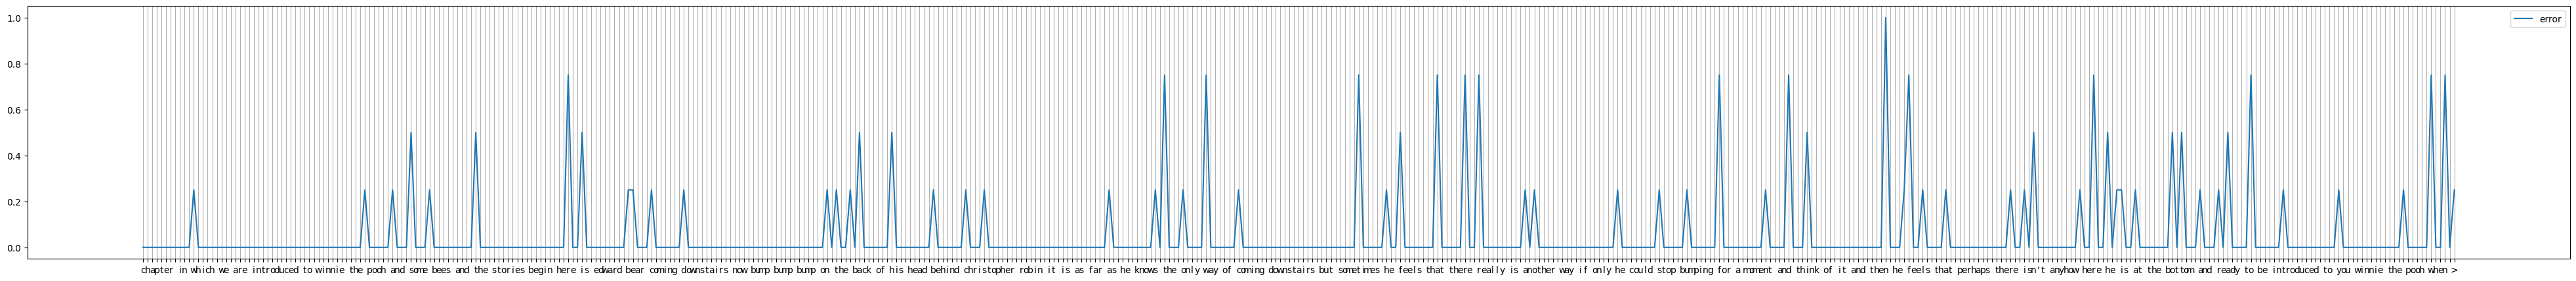

dv_key='predictability'


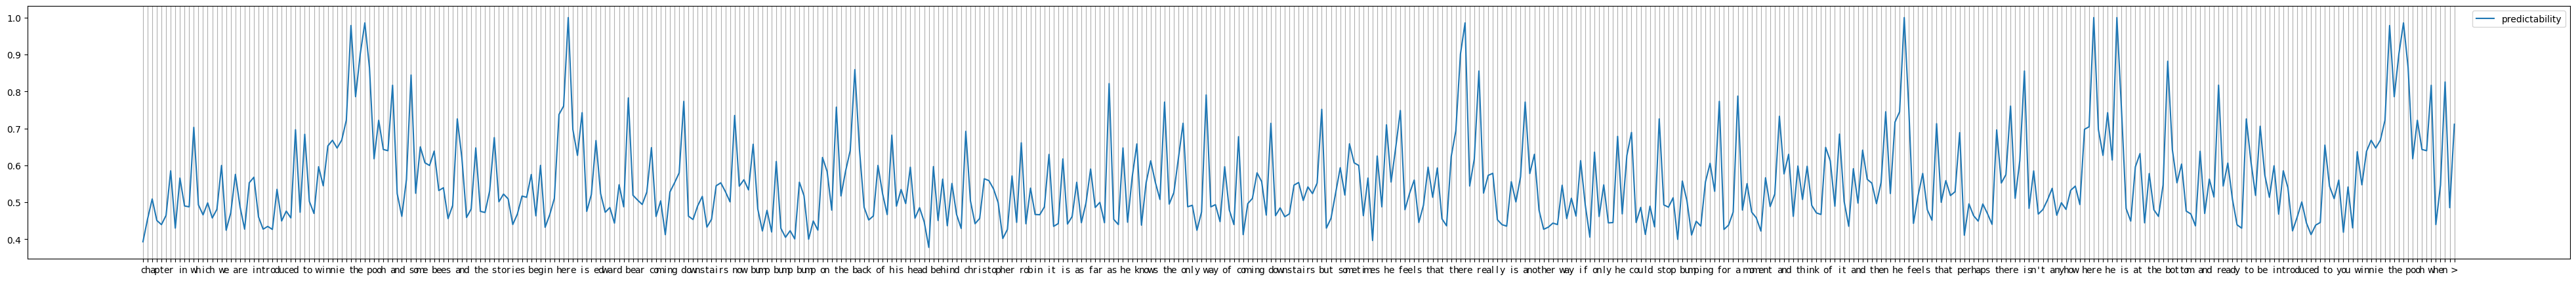

dv_key='over_mean'


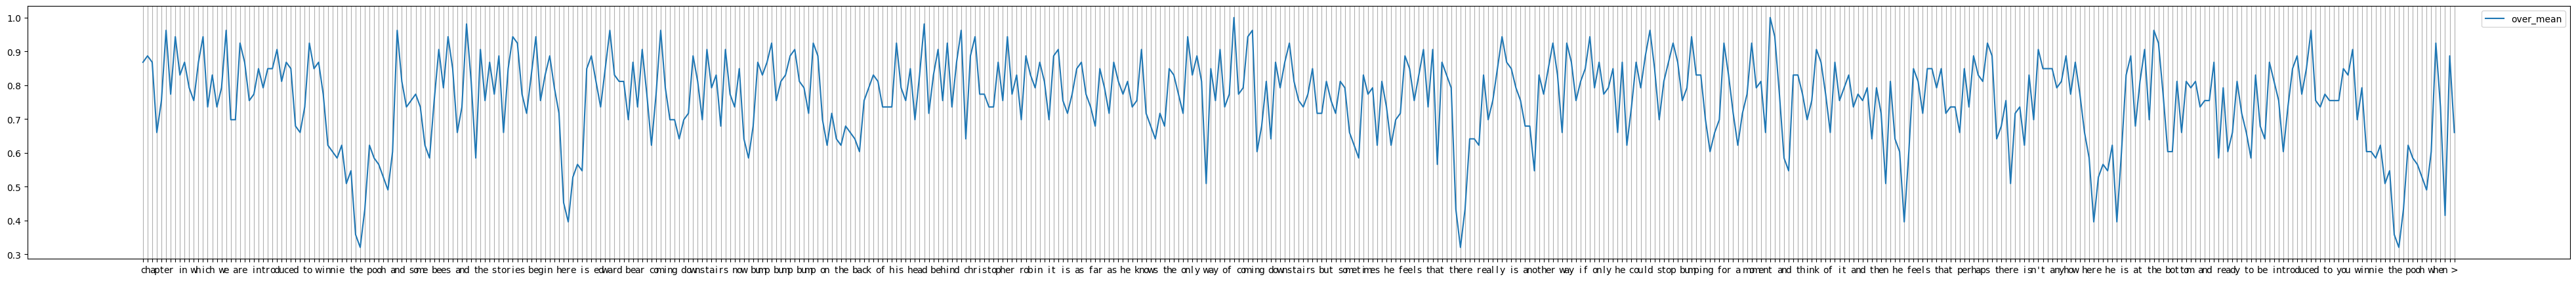

dv_key='entropy'


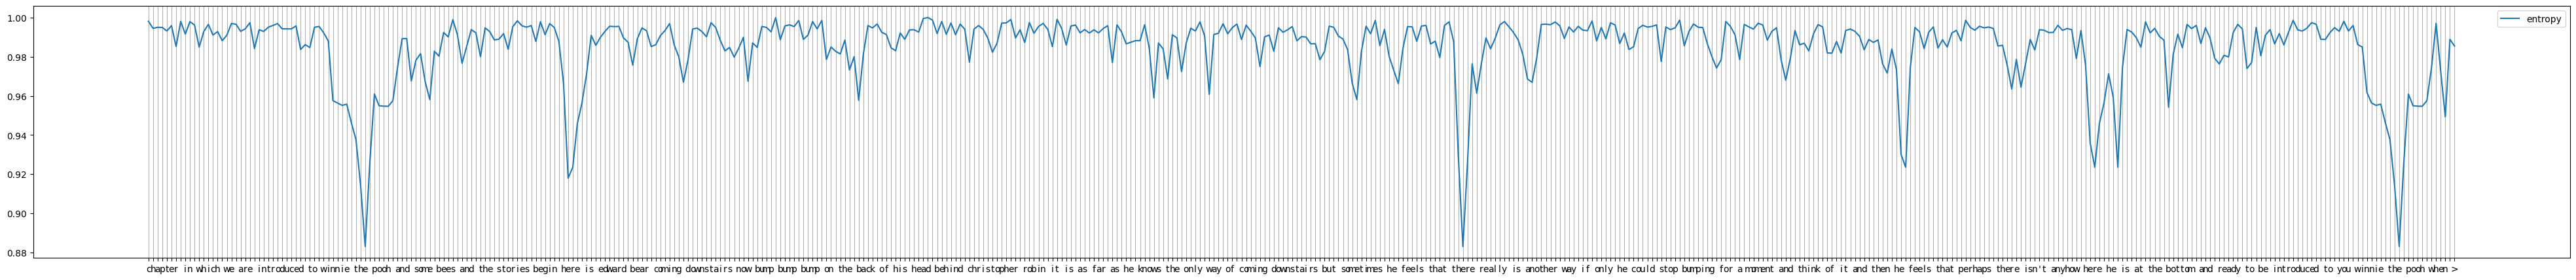

dv_key='active_out'


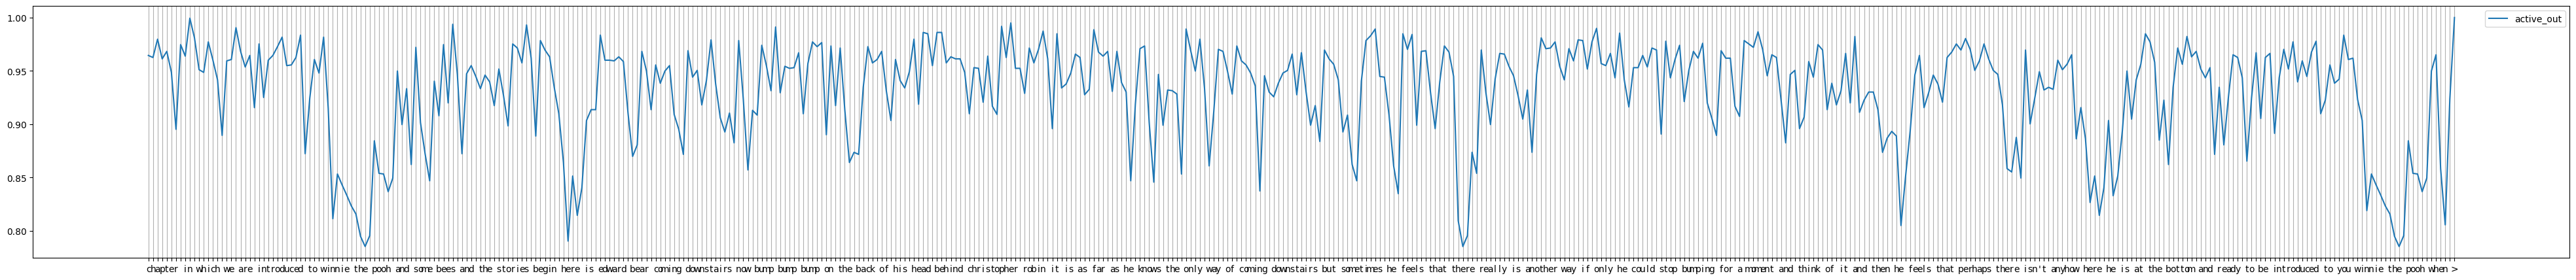

In [9]:
for dv_key, dv in dividers.items():
    plt.figure(figsize=(50, 5))

    plt.plot(np.arange(len(dv)), dv, label = dv_key)

    plt.xticks(np.arange(len(input_str[1:])), input_str[1:])
    plt.grid(visible=True, axis='x')

    plt.legend()
    print(f'{dv_key=}')
    plt.show()
    
    plt.close()

In [10]:
from numpy import ndarray

def get_diff_0(C: ndarray):
    return np.copy(C)

def get_diff_1(C: ndarray):
    return C - np.pad(C, (1, 0))[:-1]


def get_diff_2(C: ndarray):
    diff_C = get_diff_1(C)

    return diff_C - np.pad(diff_C, (1, 0))[:-1]


a = np.arange(1, 10)**2
print(a)
c = get_diff_1(a)
print(c)
c = get_diff_2(a)
print(c)


[ 1  4  9 16 25 36 49 64 81]
[ 1  3  5  7  9 11 13 15 17]
[1 2 2 2 2 2 2 2 2]


In [23]:
def divide_by_peak(C: ndarray, inputs: list, is_gt: bool = True):
    substrings: dict[str, int] = {}
    buffer = []

    peaks: dict[int, int] = {}

    for inp_idx, inp in enumerate(inputs):
        buffer.append(inp)

        if inp_idx == 0 or inp_idx >= len(inputs) - 2:
            continue

        C_idx = inp_idx # + 1

        if (is_gt and C[C_idx] > C[C_idx - 1] and C[C_idx] > C[C_idx + 1]) or \
                (not is_gt and C[C_idx] < C[C_idx - 1] and C[C_idx] < C[C_idx + 1]):
            substr = ''.join(buffer)

            substrings.setdefault(substr, 0)
            substrings[substr] += 1

            buffer = []

            peaks.setdefault(inp_idx, 1)

    # sort
    substrings = dict(
        sorted(substrings.items(), key=lambda item: item[1], reverse=True))

    peaks.setdefault((len(inputs) - 1), 1)

    return substrings, peaks


In [20]:
def divide_by_cliff(C: ndarray, inputs: list, is_gt: bool = True):
    substrings: dict[str, int] = {}
    buffer = []

    cliffs: dict[int, int] = {}

    for inp_idx, inp in enumerate(inputs):
        buffer.append(inp)

        if inp_idx == 0 or inp_idx >= len(inputs) - 1:
            continue

        C_idx = inp_idx # + 1

        if (is_gt and C[C_idx] > C[C_idx - 1]) or (not is_gt and C[C_idx] < C[C_idx - 1]):
            substr = ''.join(buffer)

            substrings.setdefault(substr, 0)
            substrings[substr] += 1

            buffer = []

            cliffs.setdefault(inp_idx, 1)

    # sort
    substrings = dict(sorted(substrings.items(), key=lambda item: item[1], reverse=True))

    cliffs.setdefault((len(inputs) - 1), 1)

    return substrings, cliffs


In [27]:
# generate dividers
get_diff_list = [get_diff_0, get_diff_1, get_diff_2]
divide_by_list = [divide_by_cliff, divide_by_peak]
gt_list = [True, False]

divide_idx: dict[str, dict[int, int]] = {}

for dv_key, dv in dividers.items():
    for get_diff in get_diff_list: 
        for divide_by in divide_by_list:
            for gt in gt_list:
                temp_dv = get_diff(dv)
                substrings, dv_idx = divide_by(temp_dv, inputs=input_str, is_gt=gt)

                divide_idx.setdefault(f'{dv_key}_{get_diff.__name__}_{divide_by.__name__}_gt={gt}', dv_idx)

# test
print(f'{len(divide_idx)=}')

for k, v in divide_idx.items():
    print(f'{k} : {len(v)} : {list(v.keys())}')

len(divide_idx)=60
error_get_diff_0_divide_by_cliff_gt=True : 66 : [11, 48, 54, 58, 62, 72, 92, 95, 105, 110, 117, 148, 150, 153, 155, 162, 171, 178, 182, 209, 219, 221, 225, 230, 237, 263, 269, 272, 280, 286, 289, 299, 301, 319, 328, 334, 341, 351, 356, 360, 377, 381, 382, 385, 390, 404, 407, 409, 419, 422, 425, 427, 431, 439, 441, 445, 449, 451, 456, 463, 475, 489, 495, 498, 500, 501]
error_get_diff_0_divide_by_cliff_gt=False : 64 : [12, 49, 55, 59, 63, 73, 93, 96, 107, 111, 118, 149, 151, 154, 156, 163, 172, 179, 183, 210, 220, 222, 226, 231, 238, 264, 270, 273, 281, 287, 290, 300, 302, 320, 329, 335, 342, 352, 357, 361, 378, 383, 386, 391, 405, 408, 410, 420, 423, 426, 429, 432, 440, 442, 446, 450, 452, 457, 464, 476, 490, 496, 499, 501]
error_get_diff_0_divide_by_peak_gt=True : 62 : [11, 48, 54, 58, 62, 72, 92, 95, 110, 117, 148, 150, 153, 155, 162, 171, 178, 182, 209, 219, 221, 225, 230, 237, 263, 269, 272, 280, 286, 289, 299, 301, 319, 328, 334, 341, 351, 356, 360, 377, 382, 385

np.mean(over_mean_arr)=41.662674650698605 over_mean_arr.max()=62.0 over_mean_arr.min()=22.0
np.mean(entropy_arr)=38.4733813993939 entropy_arr.max()=39.34140716666265 entropy_arr.min()=36.089608463673954 entropy_arr.size=501


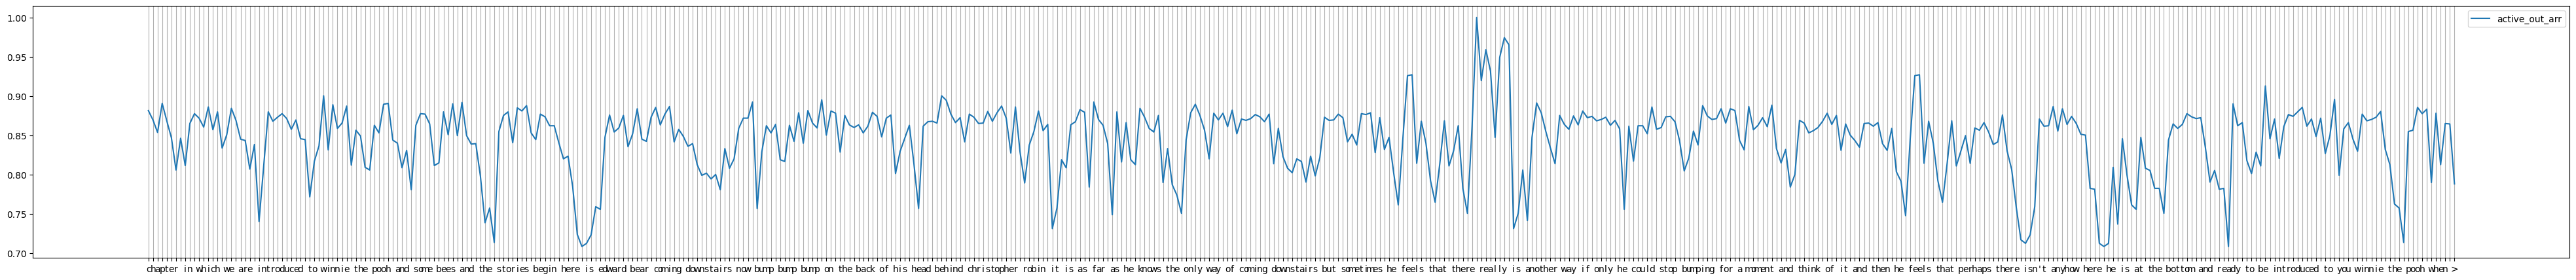

In [ ]:
error_arr = np.array(error, dtype='float')
over_mean_arr = np.array(over_mean_list, dtype='float')
entropy_arr = np.array(entropy_list, dtype='float')
predictability_arr = np.array(predictability_list, dtype='float')
active_out_arr = np.array(active_out_list, dtype='float')

print(f'{np.mean(over_mean_arr)=} {over_mean_arr.max()=} {over_mean_arr.min()=}')
print(f'{np.mean(entropy_arr)=} {entropy_arr.max()=} {entropy_arr.min()=} {entropy_arr.size=}')

error_arr /= np.max(np.abs(error_arr)) + prec
# over_mean_arr = 1 / over_mean_arr
over_mean_arr /= np.max(np.abs(over_mean_arr)) + prec
entropy_arr /= np.max(np.abs(entropy_arr)) + prec
predictability_arr /= np.max(np.abs(predictability_arr)) + prec
active_out_arr /= np.max(np.abs(active_out_arr)) + prec

plt.figure(figsize=(50, 5))

# plt.plot(np.arange(error_arr.size), error_arr, label = "error_arr")
# plt.plot(np.arange(len(over_mean_arr)), over_mean_arr, label = "over_mean_arr")
# plt.plot(np.arange(len(entropy_arr)), entropy_arr, label = "entropy_arr")
# plt.plot(np.arange(len(predictability_arr)), predictability_arr, label = "predictability_arr")
plt.plot(np.arange(len(active_out_arr)), active_out_arr, label = "active_out_arr")

plt.xticks(np.arange(len(input_str[1:])), input_str[1:])
plt.grid(visible=True, axis='x')

plt.legend()
plt.show()